In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# CSVファイルを読み込み
df = pd.read_csv("trajectoryRun.csv")

# 必要な列があるか確認
if not set(['time','x', 'y',]).issubset(df.columns):
    raise ValueError("CSVに 'time','x', 'y',列が必要です")


# X-tグラフの描画

## データ抽出

In [3]:
# xの移動距離 = 現在のX座標 - 初期x座標
x_distance = df['x'] - df['x'].iloc[0] # iloc[n]はデータにより可変
y_distance = df['y'] - df['y'].iloc[0]


total_distance  = np.sqrt(x_distance**2 + y_distance**2)
time = df['time']

# 結果をDataFrameにまとめる
x_t = pd.DataFrame({
	'time':time,
	'total_distance':total_distance,
	})

print(x_t)


     time  total_distance
0    7.25        0.000000
1    7.50        0.351153
2    7.75        0.673154
3    8.00        0.954772
4    8.25        1.259083
5    8.50        1.571106
6    8.75        1.896057
7    9.00        2.238336
8    9.25        2.536163
9    9.50        2.822807
10   9.75        3.111980
11  10.00        3.415590
12  10.25        3.766946
13  10.50        3.998428
14  10.75        4.237073
15  11.00        4.488376
16  11.25        4.709156
17  11.50        4.923969
18  11.75        5.101496
19  12.00        5.278506
20  12.25        5.455753
21  12.50        5.633179
22  12.75        5.899371
23  13.00        6.231549
24  13.25        6.553322


## グラフの描画

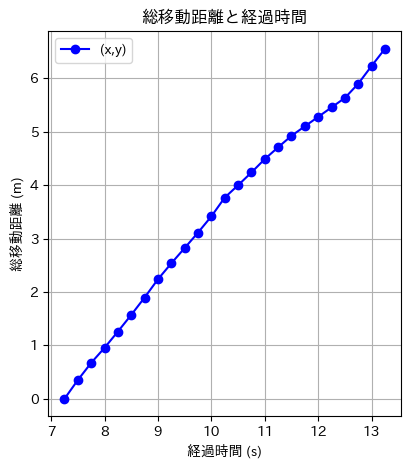

In [4]:

plt.figure(figsize=(10, 5))
plt.plot(time, total_distance, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('経過時間 (s)')
plt.ylabel('総移動距離 (m)')
plt.title('総移動距離と経過時間')
# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()

In [5]:

# 座標差分と時間差分を計算
dt = df['time'].diff()
dx = df['x'].diff()
dy = df['y'].diff()


# 移動距離と速度を計算（速度 = 距離 / 時間）
distance = np.sqrt(dx**2 + dy**2)
speed = distance / dt

# 1行目はNaNになるので除外
speed = speed[1:].reset_index(drop=True)

# 結果をDataFrameにまとめる
result_df = pd.DataFrame({'speed': speed})

       speed
0   1.404613
1   1.288002
2   1.127186
3   1.219850
4   1.256210
5   1.313367
6   1.382046
7   1.207542
8   1.156380
9   1.176377
10  1.252942
11  1.433531
12  0.964252
13  0.996776
14  1.058360
15  0.886470
16  0.859719
17  0.726361
18  0.723818
19  0.721070
20  0.720294
21  1.100594
22  1.388389
23  1.346562


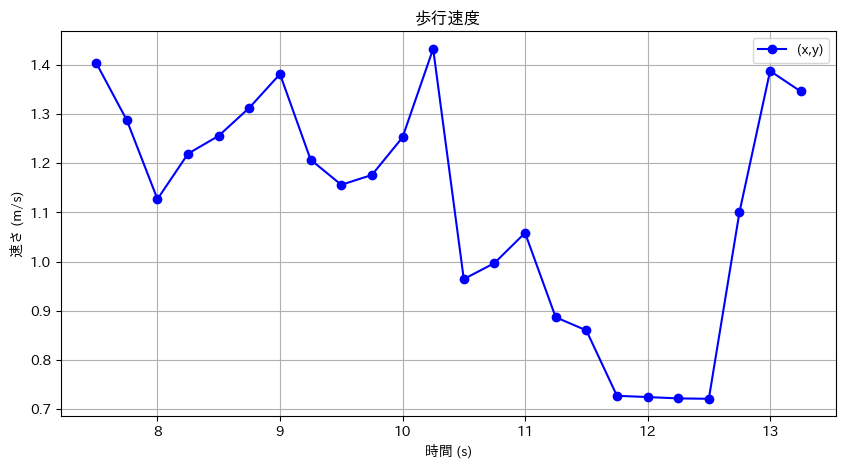

In [6]:
# 出力ファイル名
output_csv = "speedRun.csv"

# CSV出力
result_df.to_csv(output_csv, index=False)

# 結果を表示
print(result_df)

# 時間も1行目を除いて整形（速度と対応する時間）
time = df['time'][1:].reset_index(drop=True)

# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(time, speed, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('時間 (s)')
plt.ylabel('速さ (m/s)')
plt.title('歩行速度')
plt.grid(True)
plt.legend()